#Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16,8

In [2]:
import numpy as np
import pandas as pd

In [3]:
import os, sys, inspect

script_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
# add the path to opengrid to sys.path
sys.path.append(os.path.join(script_dir, os.pardir, os.pardir))

#Create Test Data

In [4]:
date = [1388534400000, 1391212800000, 1393632000000, 1396310400000, 1398902400000, 1401580800000, 1404172800000, 1406851200000, 1409529600000, 1412121600000, 1414800000000, 1417392000000] #eerste dag van de maand in 2014
y = [93906.1, 74794.7, 61266.9, 24086.9, 20694.7, 1321.7, 0, 0, 0, 23711.2, 53668.7, 148793.7] #gas in kWh
x1 = [321, 277, 228, 121, 99, 26, 6, 35, 23, 92, 224, 376] #graaddagen
x2 = [-20.3, -6.4, -29.3, -3.6, 0, 0, 0, 0, 0, 0, -7.3, -125.3] #vorst

In [5]:
#convert unix timestamp to datetimeIndex
date = [x/1000 for x in date]
date = np.array(date).astype('datetime64[s]')
date = pd.DatetimeIndex(date)

In [6]:
dict = {
    'gas': pd.Series(y, index=date),
    'graaddagen': pd.Series(x1, index=date),
    'vorst': pd.Series(x2, index=date)
}

In [7]:
df = pd.DataFrame(dict)

##Let's check out the test data

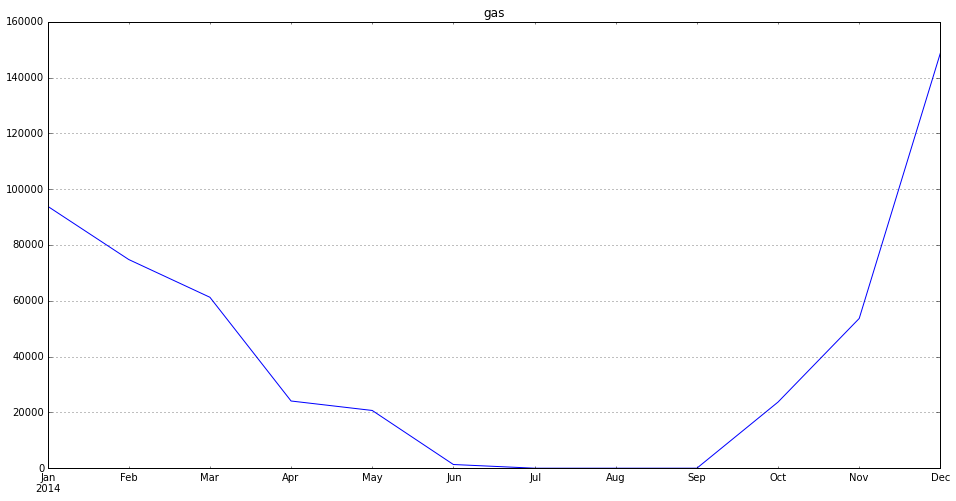

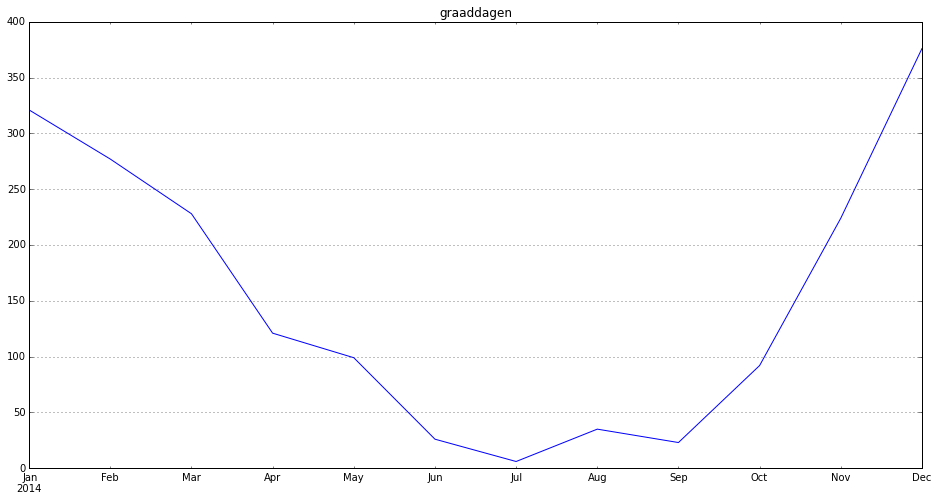

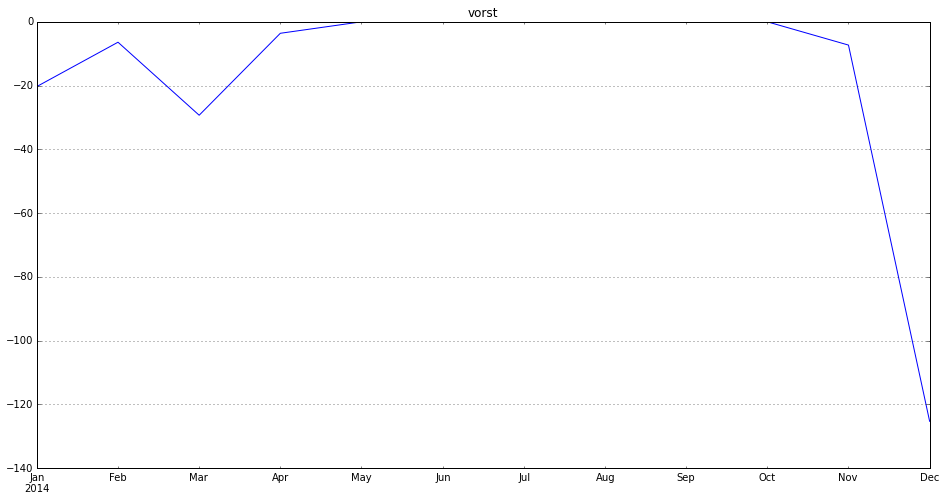

In [8]:
for column in df.columns:
    plt.figure()
    df[column].plot(title='{}'.format(column))

#Analysis

In [9]:
from opengrid.library.analyses.linearRegression import LinearRegression3
from opengrid.library.analyses.multiVariateLinearRegression import MultiVariateLinearRegression

##Linear Regression with Degree Days

This is a 2D linear regression that uses a progressive breakpoint.
It only uses degree days

In [10]:
LR = LinearRegression3(data=df, breakpoint=60, percentage=2, xName='graaddagen', yName='gas')

We can plot the response of this regression

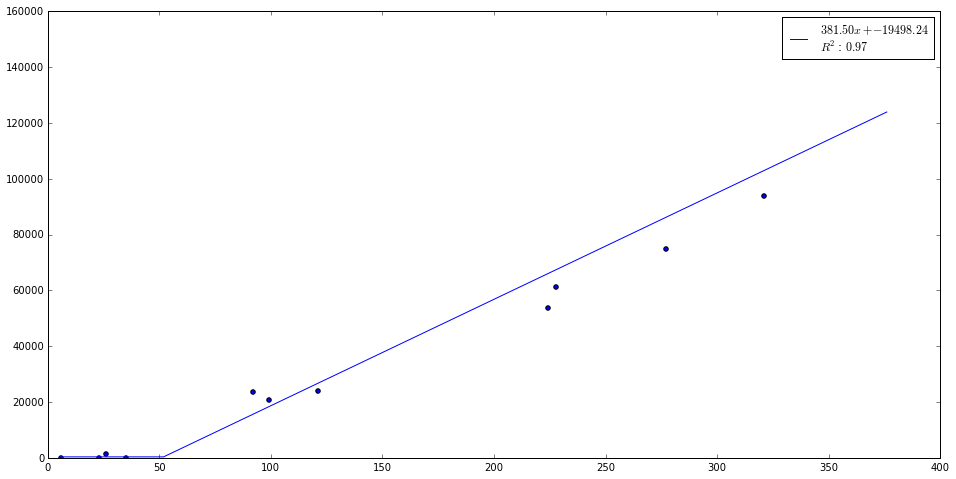

In [11]:
fig = LR.toPlt()

##Multi Variate Linear Regression

This regression uses both degree days and frost

In [12]:
MVLR = MultiVariateLinearRegression(data=df, dependentVariable='gas')

We cannot plot the response for this regression, but we can take a look at the statistical parameters

In [16]:
MVLR.result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gas   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     650.5
Date:                Fri, 21 Aug 2015   Prob (F-statistic):           1.85e-10
Time:                        17:29:05   Log-Likelihood:                -115.58
No. Observations:                  12   AIC:                             237.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -6271.9225   2072.784     -3.026      0.014      -1.1e+04 -1582.960
graaddagen   272.7737     13.934     19.576      0.000       241.253   304.294
vorst       -410.3924     49.992     -8.209      0.000      -523.483  -297.302
==============================================================================
Omnibus:                        1.154   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.561   Jarque-Bera (JB):                0.777
Skew:                          -0.257   Prob(JB):                        0.678
Kurtosis:                       1.864   Cond. No.                         333.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Plot Models

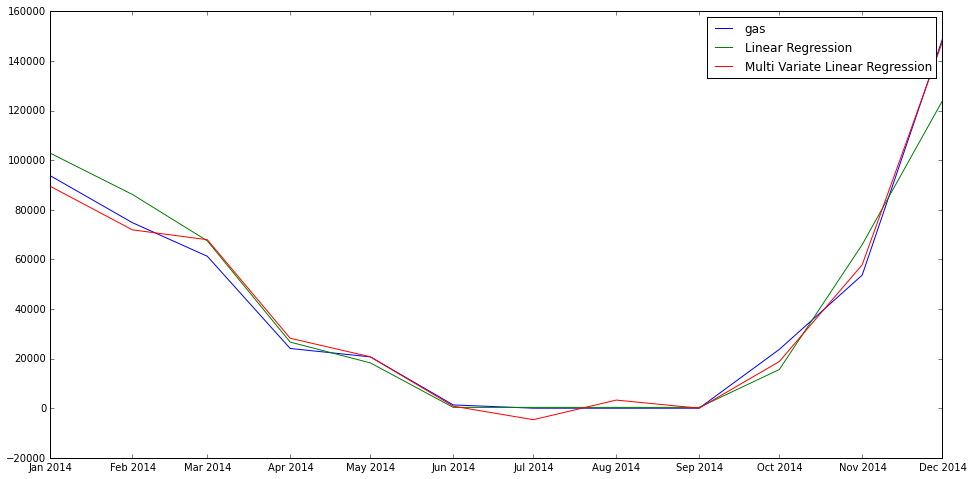

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot_date(df.index, df['gas'],'-',label='gas')
ax1.plot_date(df.index, LR.getY(df['graaddagen']), '-', label='Linear Regression')
ax1.plot_date(df.index, MVLR.result.fittedvalues, '-', label='Multi Variate Linear Regression')

plt.legend()

• Note december, a very cold month where the effect of the included frost in the MVLR is very clear

• Note the effect on the summer months of the breakpoint implemented in the 2D linear regression. The (incomplete MVLR) predicts negative consumption